In [25]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [13]:
data = pd.read_csv(r'..\\data\\creditcard.csv')

X_raw = data.iloc[:, 0:-1]
y_raw = data.iloc[:, -1]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

# over sampling
sm = SMOTE(random_state=0)
X_train_raw, y_train = sm.fit_sample(X_train_raw, y_train)

# tree based feature selection
tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree.fit(X_train_raw, y_train)
model = SelectFromModel(tree, prefit=True)

X_train = model.transform(X_train_raw)
X_test = model.transform(X_test_raw)

In [14]:
X_train.shape

(398038, 3)

In [31]:
clf = RandomForestClassifier(n_estimators=300, max_depth=4, random_state=0, criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

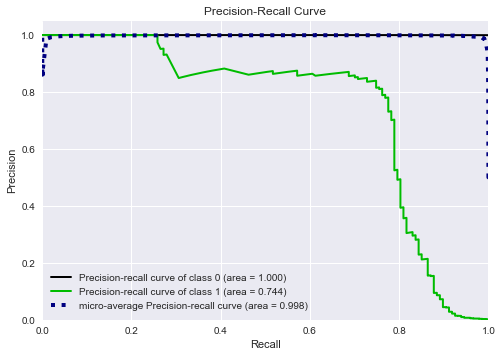

In [32]:
y_hat = clf.predict_proba(X_test)

skplt.metrics.plot_precision_recall_curve(y_test, y_hat)
plt.show()

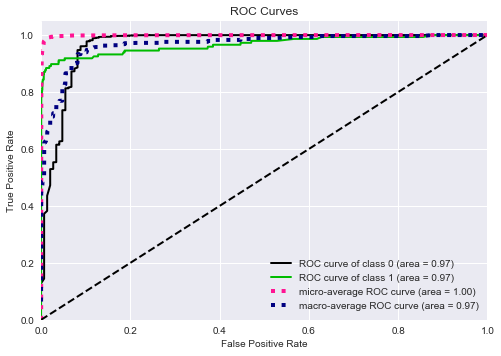

In [30]:
skplt.metrics.plot_roc_curve(y_test, y_hat)
plt.show()